In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
import cv2
import sys
from google.colab import drive

drive.mount('/content/gdrive/')

my_local_drive='/content/gdrive/My Drive/Reconnaissance'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd


Mounted at /content/gdrive/
/content/gdrive/My Drive/Reconnaissance


'/content/gdrive/My Drive/Reconnaissance'

In [ ]:
n = 36

imgs =[]
#revoir calcul dimension pour tenir dans la mémoire en local

for i in range(n):
    img =cv2.imread('yale/face'+str(i)+'.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # scale_percent = 25 # percent of original size
  #   width = int(gray.shape[1] * scale_percent / 100)
  #   height = int(gray.shape[0] * scale_percent / 100)
  #   dim = (width, height)
  #   resized = cv2.resize(gray, dim, interpolation = cv2.INTER_AREA)  
    gray = np.ndarray.flatten(gray)
    imgs.append(gray)
    #np.stack(imgs, gray, axis=1)

img =cv2.imread('yale/tora.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.ndarray.flatten(gray)
imgs.append(gray)

numpy_array = np.array(imgs)
average = np.mean(numpy_array,axis=0)
numpy_array = numpy_array - np.tile(average,(numpy_array.shape[0],1))
transpose = numpy_array.T

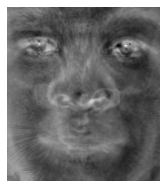

[2.29506279e+04 1.16809729e+04 1.02267201e+04 9.54358475e+03
 8.55785027e+03 7.68883583e+03 6.82925838e+03 6.14424570e+03
 5.71821815e+03 5.11623456e+03 4.85485482e+03 4.58222058e+03
 4.46747807e+03 4.37564082e+03 3.97839744e+03 3.75995370e+03
 3.68896722e+03 3.56730269e+03 3.53320847e+03 3.38150432e+03
 3.25573820e+03 3.13432591e+03 3.03668194e+03 2.93068876e+03
 2.80580170e+03 2.74934181e+03 2.67053089e+03 2.64334234e+03
 2.52185445e+03 2.44331186e+03 2.40681076e+03 2.33665531e+03
 2.16976041e+03 2.10770775e+03 2.09334418e+03 1.87055381e+03
 6.03231220e-12]


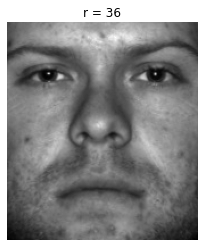

In [ ]:
U, S, VT = np.linalg.svd(transpose,full_matrices=0)

fig1 = plt.figure()
ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(192,168)))
img_u1.set_cmap('gray')
plt.axis('off')
plt.show()
print(S)
r = 36
testFaceMS = transpose[:,0]
reconFace =  average + U[:,:r]  @ U[:,:r].T @ testFaceMS
img = plt.imshow(np.reshape(reconFace,(192,168)))
img.set_cmap('gray')
plt.title('r = ' + str(r))
plt.axis('off')
plt.show()

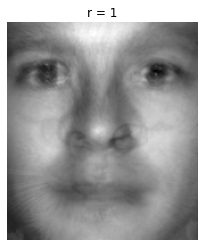

In [ ]:
catImg =cv2.imread('yale/tora.jpeg')
gray = cv2.cvtColor(catImg, cv2.COLOR_BGR2GRAY)
cat = np.ndarray.flatten(gray)-average
r = 1
reconFace =  average + U[:,:r]  @ U[:,:r].T @ cat
#reconFace =  VT[:,:r]  @ VT[:,:r] @ testFaceMS
img = plt.imshow(np.reshape(reconFace,(192,168)))
img.set_cmap('gray')
plt.title('r = ' + str(r))
plt.axis('off')
plt.show()

In [ ]:
w = cat @ U[:,:r]
weights = []
for image in numpy_array :
  weights.append(image @ U[:,:r])
print(weights[-1])
print(w)

[-6395.16097386]
[-6395.16097386]


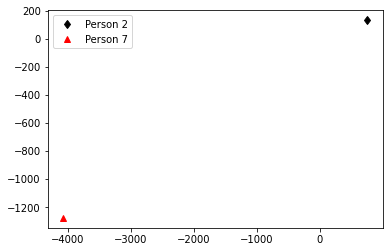

In [ ]:

P1num = 2 # Person number 2
P2num = 4 # Person number 7

P1 = transpose[:,P1num]
P2 = transpose[:,P2num]

PCAmodes = [3, 8] # Project onto PCA modes 5 and 6
PCACoordsP1 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P1
PCACoordsP2 = U[:,PCAmodes-np.ones_like(PCAmodes)].T @ P2


plt.plot(PCACoordsP1[0],PCACoordsP1[1],'d',color='k',label='Person 2')
plt.plot(PCACoordsP2[0],PCACoordsP2[1],'^',color='r',label='Person 7')

plt.legend()
plt.show()